In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
phool = pd.read_csv('jointdata.csv')
phool.head()

,AHIPC,Aspine,AHIPR,AER,AWR,AHR,Gender
0,1.074197,1.104815,1.058009,1.086524,0.983399,0.955172,1
1,0.941238,0.974563,0.928442,0.947999,0.828988,0.801955,1
2,1.115748,1.148227,1.095521,1.138274,1.045892,1.017264,1
3,0.941148,0.990126,0.920284,0.945852,0.842392,0.817208,1
4,0.943126,0.971330,0.920808,0.952584,0.855468,0.828205,1


In [17]:
X = phool.iloc[:, :-1]
y= phool.iloc[ :, -1:]

from sklearn.naive_bayes import GaussianNB
model= GaussianNB().fit(X, y)
model


D:\anaconda1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [18]:
# Training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [19]:
# training model on training set
from sklearn.naive_bayes import GaussianNB
model= GaussianNB().fit(X_train, y_train)
# making predictions on the testing set
y_pred = model.predict(X_test)
y_pred

D:\anaconda1\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes mode accuracy (in %)', metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes mode accuracy (in %) 92.85714285714286


In [21]:
# Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 3,  1],
       [ 0, 10]], dtype=int64)

Text(0.5, 1.0, 'Gaussian Bayes model accuracy in %: 92.85714285714286')

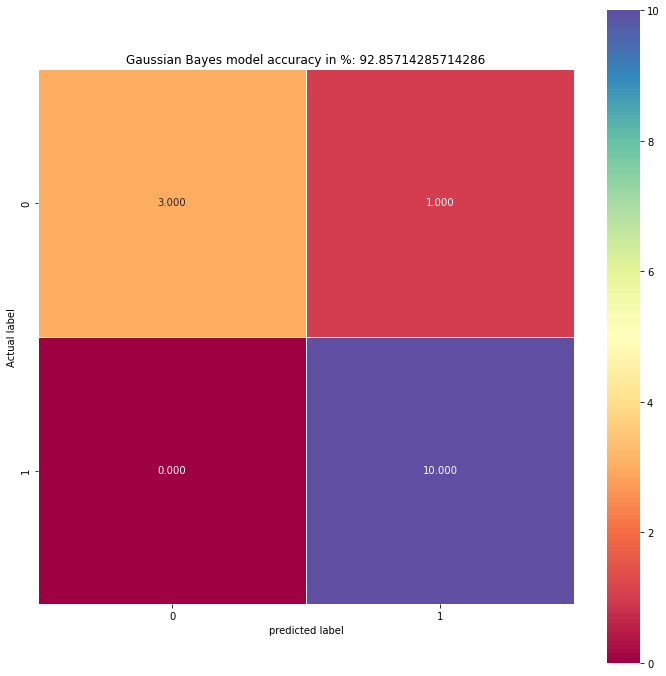

In [22]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square= True, cmap= 'Spectral')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title= 'Gaussian Bayes model accuracy in %: {0}'.format(score*100)
plt.title(all_sample_title)